In [1]:
import numpy as np

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X1, y1_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
rng = np.random.RandomState(13)
X1_stretched = np.dot(X1, rng.randn(2, 2))

np.random.seed(0)
X2 = np.random.randn(300, 2)
Y2 = np.logical_xor(X2[:, 0] > 0, X2[:, 1] > 0)

/Users/sickboi/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Представити початковi данi графiчно

In [3]:
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

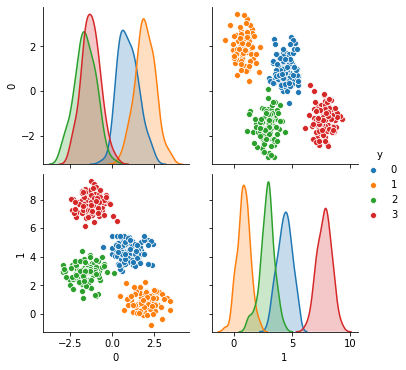

In [4]:
df1 = pd.DataFrame(X1) 
df1['y'] = y1_true.astype("int") 
sns.pairplot(df1, hue='y')

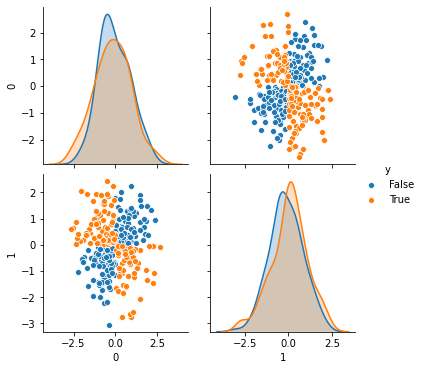

In [5]:
df2 = pd.DataFrame(X2)
df2['y'] = Y2.astype("bool")
data = df2
sns.pairplot(df2, hue='y')

# Розбити данi на навчальний i перевiрочний набори.

In [6]:
num_of_classes = 3
y1_discrete = pd.cut(y1_true, bins=num_of_classes, labels=np.arange(num_of_classes), right=False).astype('int')

In [7]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1_discrete, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Побудувати моделi класифiкацiї або регресiї згiдно з варiантом та розрахувати критерiї якостi для кожної моделi.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, 
                             f1_score, precision_recall_curve, precision_score, 
                             recall_score, roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize

In [9]:
def metrics(true, predict): 
    print('Confusion matrix:')
    cm = confusion_matrix(true, predict)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, linewidths=0, square=True) 
    plt.show()
    print("Precision score: ", precision_score(true, predict, average='micro'))
    print("Recall score: ", recall_score(true, predict, average='micro'))
    print("F1 score: ", f1_score(true, predict, average='micro'))


def roc_plot(true, probs, num_of_classes):
    if num_of_classes != 0:
        y_test = label_binarize(true, classes=[*range(num_of_classes)])
        fpr = dict()
        tpr = dict()

        for i in range(num_of_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
            plt.plot(fpr[i], tpr[i], label='class {}'.format(i))
            plt.legend(loc='best')
    
    else:
        fpr, tpr, _ = roc_curve(true, probs[:, 1])
        plt.plot(fpr, tpr)

    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title('ROC curve')
    plt.show()

    
def pr_plot(true, probs, num_of_classes):
    if num_of_classes != 0:
        y_test = label_binarize(true, classes=[*range(num_of_classes)])
        precision = dict()
        recall = dict()

        for i in range(num_of_classes):
            precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], probs[:, i])
            plt.plot(recall[i], precision[i], label='class {}'.format(i))
            plt.legend(loc='best')
    
    else:
        precision, recall, _ = precision_recall_curve(true, probs[:, 1])
        plt.plot(recall, precision)

    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('PR curve')
    plt.show()
    if num_of_classes != 0:
        for i in range(num_of_classes):
            print(f'Class {i}, AUC score: {roc_auc_score(y_test[:, i], probs[:, i])}')
    else: 
        print(f'AUC score: {roc_auc_score(true, probs[:, 1])}')

In [10]:
def analyze_model(model, x_train, y_train, x_test, y_test, num_classes=0):
        predict = model.predict(x_test)
        probs = model.predict_proba(x_test)
        metrics(y_test, predict)
        roc_plot(y_test, probs, num_classes)
        pr_plot(y_test, probs, num_classes)
        print(f'Train F1 = {f1_score(y_train, model.predict(x_train), average="micro")}'
              f' vs Test F1 = {f1_score(y_test, predict, average="micro")}')


def analyze(x_train, y_train, x_test, y_test, num_classes=0):
    for model in models:
        model.fit(x_train, y_train)
        print(f'For model {model}:')
        analyze_model(model, x_train, y_train, x_test, y_test, num_classes)
        print('\n')

In [11]:
simpleLogRegression = LogisticRegression(penalty='none', multi_class='ovr')
multinomialLogRegression = LogisticRegression(penalty='none', multi_class='multinomial', solver='lbfgs')
simpleLogRegressionReg = LogisticRegression(multi_class='ovr')
multinomialLogRegressionReg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
models = [simpleLogRegression, multinomialLogRegression,
          simpleLogRegressionReg, multinomialLogRegressionReg]

## 1st dataset

For model LogisticRegression(multi_class='ovr', penalty='none'):
Confusion matrix:


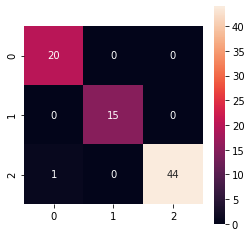

Precision score:  0.9875
Recall score:  0.9875
F1 score:  0.9875


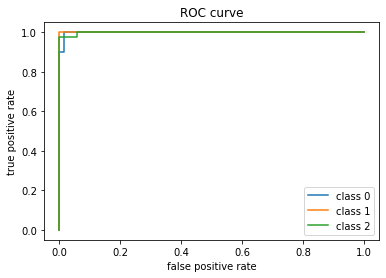

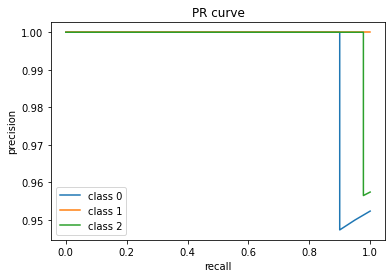

Class 0, AUC score: 0.9983333333333333
Class 1, AUC score: 1.0
Class 2, AUC score: 0.9987301587301587
Train F1 = 0.984375 vs Test F1 = 0.9875


For model LogisticRegression(multi_class='multinomial', penalty='none'):
Confusion matrix:


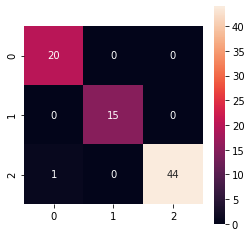

Precision score:  0.9875
Recall score:  0.9875
F1 score:  0.9875


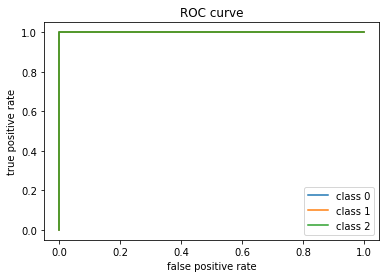

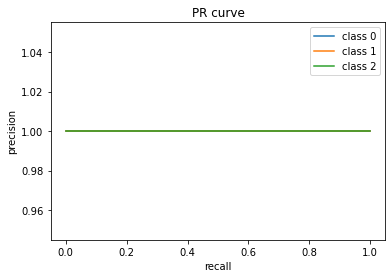

Class 0, AUC score: 1.0
Class 1, AUC score: 1.0
Class 2, AUC score: 1.0
Train F1 = 0.990625 vs Test F1 = 0.9875


For model LogisticRegression(multi_class='ovr'):
Confusion matrix:


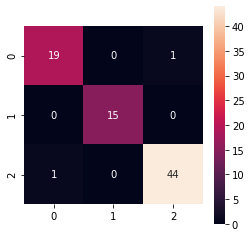

Precision score:  0.975
Recall score:  0.975
F1 score:  0.975


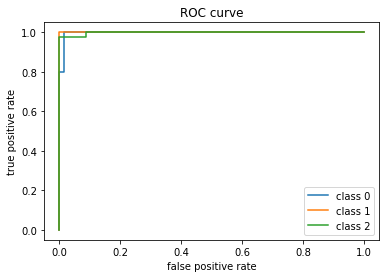

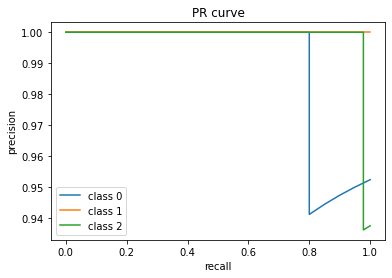

Class 0, AUC score: 0.9966666666666666
Class 1, AUC score: 1.0
Class 2, AUC score: 0.998095238095238
Train F1 = 0.98125 vs Test F1 = 0.975


For model LogisticRegression(multi_class='multinomial'):
Confusion matrix:


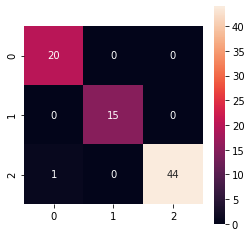

Precision score:  0.9875
Recall score:  0.9875
F1 score:  0.9875


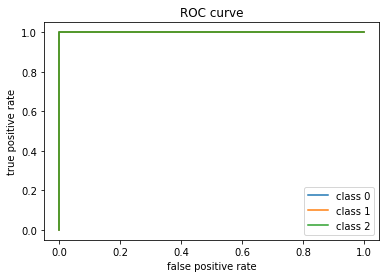

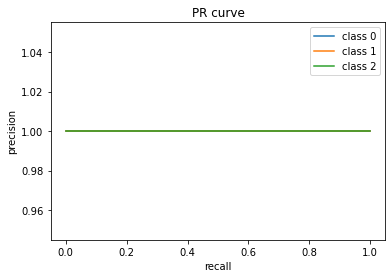

Class 0, AUC score: 1.0
Class 1, AUC score: 1.0
Class 2, AUC score: 1.0
Train F1 = 0.990625 vs Test F1 = 0.9875




In [12]:
analyze(X1_train, y1_train, X1_test, y1_test, num_classes=num_of_classes)

## 2nd dataset

For model LogisticRegression(multi_class='ovr', penalty='none'):
Confusion matrix:


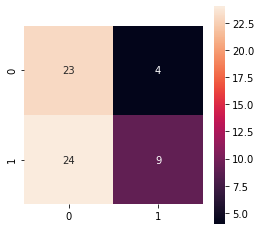

Precision score:  0.5333333333333333
Recall score:  0.5333333333333333
F1 score:  0.5333333333333333


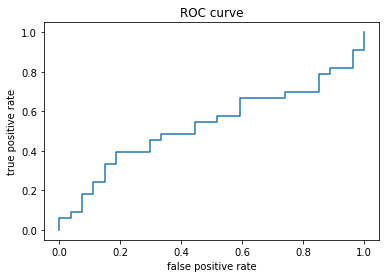

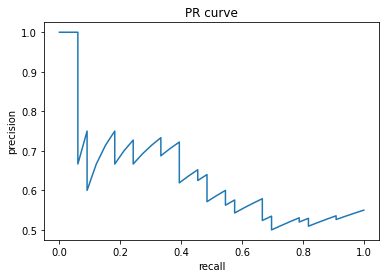

AUC score: 0.5308641975308642
Train F1 = 0.6541666666666667 vs Test F1 = 0.5333333333333333


For model LogisticRegression(multi_class='multinomial', penalty='none'):
Confusion matrix:


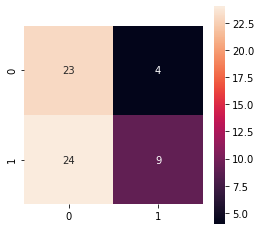

Precision score:  0.5333333333333333
Recall score:  0.5333333333333333
F1 score:  0.5333333333333333


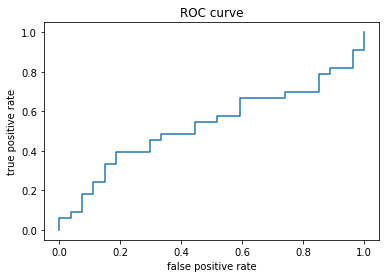

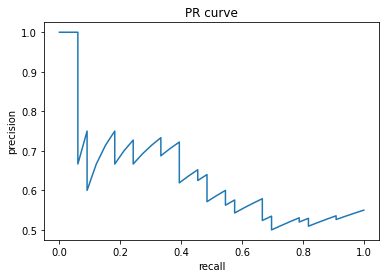

AUC score: 0.5308641975308642
Train F1 = 0.6541666666666667 vs Test F1 = 0.5333333333333333


For model LogisticRegression(multi_class='ovr'):
Confusion matrix:


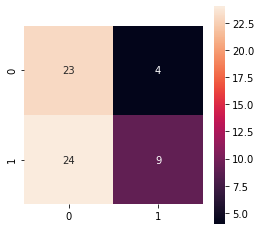

Precision score:  0.5333333333333333
Recall score:  0.5333333333333333
F1 score:  0.5333333333333333


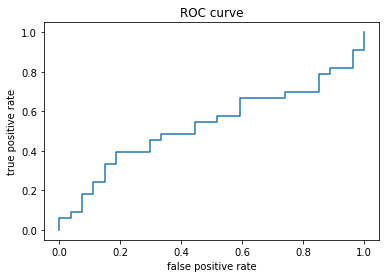

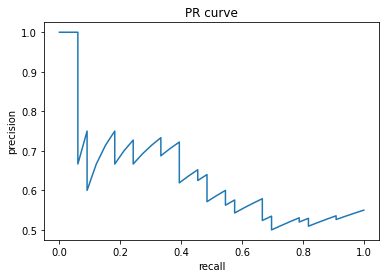

AUC score: 0.5308641975308642
Train F1 = 0.6541666666666667 vs Test F1 = 0.5333333333333333


For model LogisticRegression(multi_class='multinomial'):
Confusion matrix:


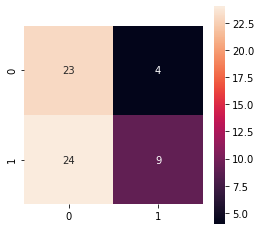

Precision score:  0.5333333333333333
Recall score:  0.5333333333333333
F1 score:  0.5333333333333333


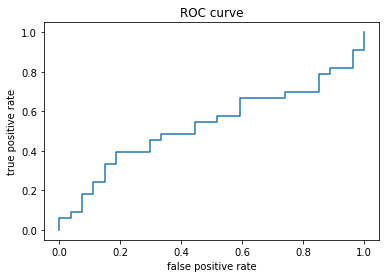

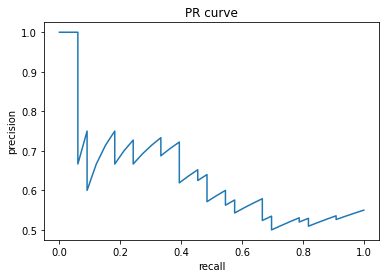

AUC score: 0.5308641975308642
Train F1 = 0.6541666666666667 vs Test F1 = 0.5333333333333333




In [13]:
analyze(X2_train, y2_train, X2_test, y2_test)

# Виконати решiтчатий пошук для пiдбору гiперпараметрiв моделей

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid_values = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver':['liblinear', 'saga']},
               {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                'solver':['newton-cg', 'lbfgs', 'sag']}]

/Users/sickboi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Best params:
{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Confusion matrix:


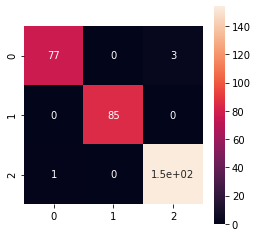

Precision score:  0.9875
Recall score:  0.9875
F1 score:  0.9875


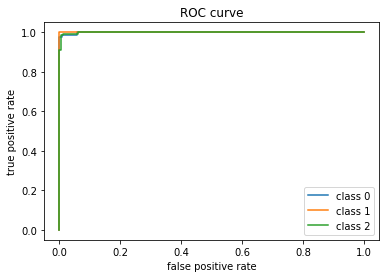

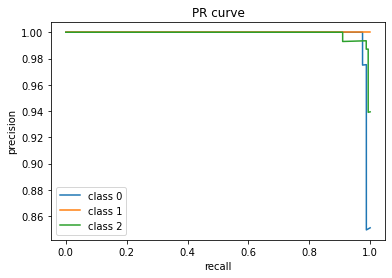

Class 0, AUC score: 0.9991666666666666
Class 1, AUC score: 1.0
Class 2, AUC score: 0.9990615835777127
Train F1 = 0.9875 vs Test F1 = 0.9875


In [16]:
grid_search_1 = GridSearchCV(LogisticRegression(), grid_values, cv=5, n_jobs=-1) 
grid_search_1.fit(X1_train, y1_train)
print('Best params:')
print(grid_search_1.best_params_)
analyze_model(grid_search_1.best_estimator_, X1_test, y1_test, X1_train, y1_train, num_classes=num_of_classes)

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion matrix:


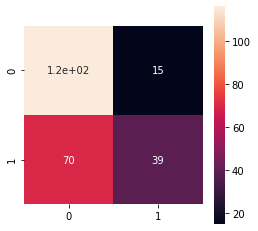

Precision score:  0.6458333333333334
Recall score:  0.6458333333333334
F1 score:  0.6458333333333334


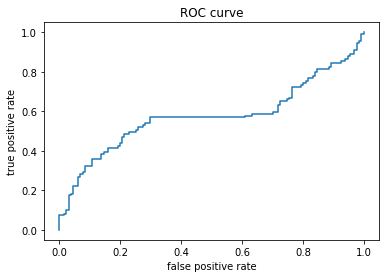

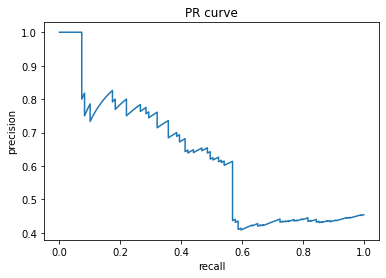

AUC score: 0.5737096435324602
Train F1 = 0.5333333333333333 vs Test F1 = 0.6458333333333334


In [17]:
grid_search_2 = GridSearchCV(LogisticRegression(), grid_values, cv=5, n_jobs=-1)
grid_search_2.fit(X2_train, y2_train) 
print(grid_search_2.best_params_) 
analyze_model(grid_search_2.best_estimator_, X2_test, y2_test, X2_train, y2_train)

# Зробити висновки про якiсть роботи моделей на дослiджених даних. Для кожної навчальної вибiрки на основi критерiїв якостi вибрати найкращу модель.

Як бачимо, модель дуже гарно працює на першому наборі даних, а регуляризація забезпечує ще більшу точність. Однак модель дає погані результати на другому наборі даних. Регуляризація майже не впливає на якість на другому наборі.

# Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.

In [18]:
from sklearn.model_selection import learning_curve

In [19]:
data1_best = grid_search_1.best_estimator_ 
data2_best = grid_search_2.best_estimator_ 
train_sizes1, train_scores1, test_scores1 = learning_curve(data1_best, X1_test, y1_test, 
                                                           train_sizes=np.arange(1, 67), cv=7, n_jobs=-1)
train_sizes2, train_scores2, test_scores2 = learning_curve(data2_best, X2_test, y2_test, 
                                                           train_sizes=np.arange(1, 50), cv=7, n_jobs=-1)

## first dataset

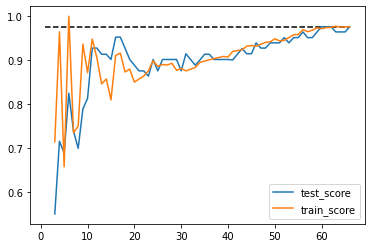

In [20]:
plt.plot(train_sizes1, np.mean(test_scores1, axis=1), label= 'test_score')
plt.plot(train_sizes1, np.mean(train_scores1, axis=1), label='train_score')
plt.hlines(np.mean([train_scores1[-1], test_scores1[-1]]), train_sizes1[0], train_sizes1[-1], linestyle='dashed') 
plt.legend(loc=0)

Отже, як можна побачити, при збільшенні розміру навчальної множини крива навчання прямує до кривої перевірки. Як уже було сказано вище, ця модель буде давати гарні результати, адже дані чітко розділені.

## second dataset

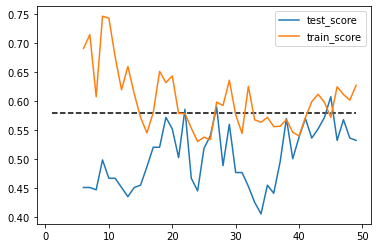

In [21]:
plt.plot(train_sizes2, np.mean(test_scores2, axis=1), label= 'test_score')
plt.plot(train_sizes2, np.mean(train_scores2, axis=1), label='train_score')
plt.hlines(np.mean([train_scores2[-1], test_scores2[-1]]), train_sizes2[0], train_sizes2[-1], linestyle='dashed') 
plt.legend(loc=0)

Як можна побачити, збільшення навчальної множини трохи покращує якість моделі. Але все одно точність не буде такою високою, адже дані погано розділяються.